In [13]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import numpy as np

# check gpu availability
if torch.cuda.device_count() > 0:
    print(torch.cuda.get_device_name(0))
else:
    print("GPU is not available, using CPU")


NVIDIA GeForce RTX 4060 Laptop GPU



image 1/1 c:\Users\ngjun\Desktop\Codes\ClearPlate\assets\image.png: 640x640 1 broccoli, 3 carrots, 1 dining table, 51.1ms
Speed: 2.5ms preprocess, 51.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict12
1 label saved to runs\segment\predict12\labels


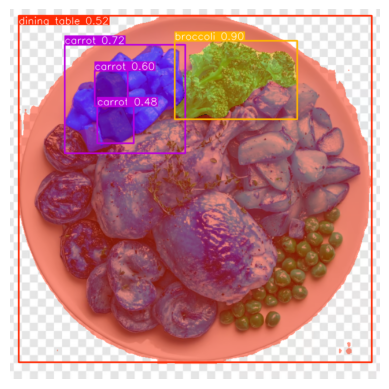

Detected: broccoli
 - Area: 44.79 cm²
 - Estimated Weight: 134.38 g
Detected: carrot
 - Area: 58.93 cm²
 - Estimated Weight: 176.78 g
Detected: carrot
 - Area: 7.27 cm²
 - Estimated Weight: 21.80 g
Detected: dining table
 - Area: 632.70 cm²
 - Estimated Weight: 1898.10 g
Detected: carrot
 - Area: 7.22 cm²
 - Estimated Weight: 21.65 g


In [22]:
# Load YOLOv8 segmentation model
model_seg = YOLO("models/yolo11x-seg.pt")  # Replace with your model path

# Inference
img_path = 'assets/image.png'
results = model_seg(img_path, save=True, save_txt=True)

# Plot segmentation results
plt.imshow(results[0].plot())  # Overlay masks and boxes
plt.axis('off')
plt.show()

# Optional: Estimate area and weight
masks = results[0].masks  # Contains segmentation masks
names = results[0].names  # Class names

# Placeholder: You should replace this with your actual density values per class
density_lookup = {
    'rice': 3.2,         # g/cm² (example)
    'chicken': 5.1,
    'vegetable': 1.8
}

# Example: define pixel/cm² using a known reference object
# For now, we hardcode it; ideally you calculate it per image
pixels_per_cm2 = 400  # Calibrated from reference object

# Estimate area and weight for each detected object
for i, cls_id in enumerate(results[0].boxes.cls.cpu().numpy()):
    label = names[int(cls_id)]
    mask = masks.data[i].cpu().numpy()
    pixel_area = np.sum(mask)

    real_area_cm2 = pixel_area / pixels_per_cm2
    density = density_lookup.get(label, 3.0)  # default fallback density
    estimated_weight = real_area_cm2 * density

    print(f"Detected: {label}")
    print(f" - Area: {real_area_cm2:.2f} cm²")
    print(f" - Estimated Weight: {estimated_weight:.2f} g")